In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
m = pd.read_csv(r'C:\Users\EMAN\Desktop\milknew.csv')

In [5]:
m.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [6]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [7]:
m.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

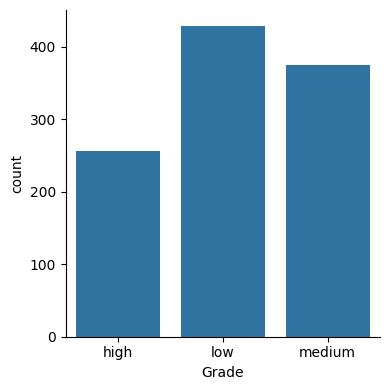

In [8]:
sns.catplot(x='Grade',data=m,kind='count',height=4)

In [35]:
x = m.drop(["Grade", "pH", "Colour"], axis=1)
y = m["Grade"]

In [36]:
x.head()

,Temprature,Taste,Odor,Fat,Turbidity
0,35,1,0,1,0
1,36,0,1,0,1
2,70,1,1,1,1
3,34,1,1,0,1
4,37,0,0,0,0


In [37]:
y.head()

0      high
1      high
2       low
3       low
4    medium
Name: Grade, dtype: object

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [39]:
print(y.shape,y_train.shape,y_test.shape)

(1059,) (847,) (212,)


In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred3=dt.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score
print("acc dt",accuracy_score(y_test,y_pred3))

acc dt 0.8820754716981132


In [43]:
rf_model=DecisionTreeClassifier()
rf_model.fit(x,y)
import joblib
joblib.dump(rf_model,"milk_prediction")
model=joblib.load("milk_prediction")

In [47]:
p=model.predict([[40,0,0,0,0]])

C:\Users\EMAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [48]:
p

array(['medium'], dtype=object)

In [49]:
import pickle
model_path = 'milk_classifier_model.pkl'
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)